#Converting to list of spans from results

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Toxic Span Detection - Semeval 2021/1-4-2021/real_test_f1_cleaned-text_results.csv')
df

FileNotFoundError: ignored

In [3]:
df.bert_large_glove = df.bert_large_glove.apply(literal_eval)
df.bert_large = df.bert_large.apply(literal_eval)
df.bert_base_glove = df.bert_base_glove.apply(literal_eval)
df.bert_base = df.bert_base.apply(literal_eval)
df

NameError: ignored

In [4]:
import numpy as np
df['scores'] = np.nan
df

NameError: ignored

In [5]:
df

NameError: ignored

In [6]:
for i in range(len(df)):
    l = []
    for j in df['bert_large'][i]:
        # print(j)
        for k in range(j[0],j[1]+1):
            l.append(k)
    # l.append('k')
    df['bert_large'][i] = l
    print(i)

NameError: ignored

In [ ]:
df

,id,text,labels,cleaned_text,bert_large_glove,bert_base_glove,bert_base,bert_large,ground
0,15,Again proving my point that right wing nuts ar...,"[[48, 53, Toxic]]",Again proving my point that right wing nuts ar...,"[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]"
1,20,"Ok Lars, its not fire, but its matches, gasoli...","[[186, 189, Toxic]]",Ok Lars its not fire but its matches gasoli...,"[186, 187, 188, 189]","[186, 187, 188, 189]","[186, 187, 188, 189]","[186, 187, 188, 189, 200, 201, 202, 203, 204, ...","[186, 187, 188, 189]"
2,37,Congratulations on wasting your pathetic life ...,"[[32, 39, Toxic], [67, 72, Toxic]]",Congratulations on wasting your pathetic life ...,"[32, 33, 34, 35, 36, 37, 38, 39, 62, 63, 64, 6...","[32, 33, 34, 35, 36, 37, 38, 39]","[32, 33, 34, 35, 36, 37, 38, 39]","[32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7...","[32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7..."
3,39,What a stupid time to close drilling in the Ar...,"[[7, 12, Toxic]]",What a stupid time to close drilling in the Ar...,"[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]"
4,51,According to crushedhopesnation Ovechkin is ex...,"[[75, 87, Toxic]]",According to crushedhopesnation Ovechkin is ex...,"[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8..."
...,...,...,...,...,...,...,...,...,...
554,5881,"clearly you are one of the lunatic liberals,,y...","[[148, 153, Toxic]]",clearly you are one of the lunatic liberals y...,"[27, 28, 29, 30, 31, 32, 33, 148, 149, 150, 15...","[27, 28, 29, 30, 31, 32, 33, 148, 149, 150, 15...","[27, 28, 29, 30, 31, 32, 33, 148, 149, 150, 15...","[27, 28, 29, 30, 31, 32, 33, 148, 149, 150, 15...","[148, 149, 150, 151, 152, 153]"
555,5883,Trump Plans To Blow Up Iran Deal Because He Re...,"[[56, 60, Toxic]]",Trump Plans To Blow Up Iran Deal Because He Re...,"[56, 57, 58, 59, 60]","[56, 57, 58, 59, 60]","[56, 57, 58, 59, 60]","[56, 57, 58, 59, 60]","[56, 57, 58, 59, 60]"
556,5889,"Damn, he was good. Seems we always find a way ...","[[0, 3, Toxic]]",Damn he was good Seems we always find a way ...,"[0, 1, 2, 3, 49, 50, 51, 52, 53, 54, 55, 56, 5...","[0, 1, 2, 3, 49, 50, 51, 52, 53]","[0, 1, 2, 3, 49, 50, 51, 52, 53]","[0, 1, 2, 3, 49, 50, 51, 52, 53]","[0, 1, 2, 3]"
557,5890,Beyak misses the point entirely. The PURPOSE O...,"[[409, 414, Toxic]]",Beyak misses the point entirely The PURPOSE O...,"[409, 410, 411, 412, 413, 414]","[409, 410, 411, 412, 413, 414]","[409, 410, 411, 412, 413, 414]","[409, 410, 411, 412, 413, 414]","[409, 410, 411, 412, 413, 414]"


In [ ]:
df.to_csv('/content/drive/MyDrive/Toxic Span Detection - Semeval 2021/1-4-2021/real_test_f1_cleaned-text_results_tolist.csv', index=False)

# Download the data and the code

In [2]:
from ast import literal_eval
import pandas as pd
import random

In [3]:
!git clone https://github.com/ipavlopoulos/toxic_spans.git
from toxic_spans.evaluation.semeval2021 import f1

Cloning into 'toxic_spans'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 298 (delta 8), reused 17 (delta 2), pack-reused 268
Receiving objects: 100% (298/298), 1.32 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [ ]:
# tsd = pd.read_csv("toxic_spans/data/tsd_trial.csv") 
# tsd.spans = tsd.spans.apply(literal_eval)
# tsd.head(1)

,spans,text
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...


### Run a random baseline
* Returns random offsets as toxic per text

In [ ]:
# # make an example with a taboo word
# taboo_word = "fucking"
# template = f"This is a {taboo_word} example."

# # build a random baseline (yields offsets at random)
# random_baseline = lambda text: [i for i, char in enumerate(text) if random.random()>0.5]
# predictions = random_baseline(template)
# print(predictions)

# # find the ground truth indices and print
# gold = list(range(template.index(taboo_word), template.index(taboo_word)+len(taboo_word)))
# print(f"Gold\t\t: {gold}")
# print(f"Predicted\t: {predictions}")

[4, 6, 7, 11, 13, 15, 18, 19, 23, 25]
Gold		: [10, 11, 12, 13, 14, 15, 16]
Predicted	: [4, 6, 7, 11, 13, 15, 18, 19, 23, 25]


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Toxic Span Detection - Semeval 2021/1-4-2021/real_test_f1_cleaned-text_results_tolist_f1scores.csv")

,id,text,labels,cleaned_text,bert_large_glove,bert_base_glove,bert_base,bert_large,ground,scores-bert_large_glove,scores-bert_large,scores-bert_base_glove,scores-bert_base
0,15,Again proving my point that right wing nuts ar...,"[[48, 53, 'Toxic']]",Again proving my point that right wing nuts ar...,"[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]",1.000000,1.000000,1.000000,1.000000
1,20,"Ok Lars, its not fire, but its matches, gasoli...","[[186, 189, 'Toxic']]",Ok Lars its not fire but its matches gasoli...,"[186, 187, 188, 189]","[186, 187, 188, 189]","[186, 187, 188, 189]","[186, 187, 188, 189, 200, 201, 202, 203, 204, ...","[186, 187, 188, 189]",1.000000,0.533333,1.000000,1.000000
2,37,Congratulations on wasting your pathetic life ...,"[[32, 39, 'Toxic'], [67, 72, 'Toxic']]",Congratulations on wasting your pathetic life ...,"[32, 33, 34, 35, 36, 37, 38, 39, 62, 63, 64, 6...","[32, 33, 34, 35, 36, 37, 38, 39]","[32, 33, 34, 35, 36, 37, 38, 39]","[32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7...","[32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7...",0.848485,1.000000,0.727273,0.727273
3,39,What a stupid time to close drilling in the Ar...,"[[7, 12, 'Toxic']]",What a stupid time to close drilling in the Ar...,"[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]",1.000000,1.000000,1.000000,1.000000
4,51,According to crushedhopesnation Ovechkin is ex...,"[[75, 87, 'Toxic']]",According to crushedhopesnation Ovechkin is ex...,"[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...",0.818182,0.818182,0.818182,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,5881,"clearly you are one of the lunatic liberals,,y...","[[148, 153, 'Toxic']]",clearly you are one of the lunatic liberals y...,"[27, 28, 29, 30, 31, 32, 33, 148, 149, 150, 15...","[27, 28, 29, 30, 31, 32, 33, 148, 149, 150, 15...","[27, 28, 29, 30, 31, 32, 33, 148, 149, 150, 15...","[27, 28, 29, 30, 31, 32, 33, 148, 149, 150, 15...","[148, 149, 150, 151, 152, 153]",0.631579,0.631579,0.631579,0.631579
555,5883,Trump Plans To Blow Up Iran Deal Because He Re...,"[[56, 60, 'Toxic']]",Trump Plans To Blow Up Iran Deal Because He Re...,"[56, 57, 58, 59, 60]","[56, 57, 58, 59, 60]","[56, 57, 58, 59, 60]","[56, 57, 58, 59, 60]","[56, 57, 58, 59, 60]",1.000000,1.000000,1.000000,1.000000
556,5889,"Damn, he was good. Seems we always find a way ...","[[0, 3, 'Toxic']]",Damn he was good Seems we always find a way ...,"[0, 1, 2, 3, 49, 50, 51, 52, 53, 54, 55, 56, 5...","[0, 1, 2, 3, 49, 50, 51, 52, 53]","[0, 1, 2, 3, 49, 50, 51, 52, 53]","[0, 1, 2, 3, 49, 50, 51, 52, 53]","[0, 1, 2, 3]",0.347826,0.615385,0.615385,0.615385
557,5890,Beyak misses the point entirely. The PURPOSE O...,"[[409, 414, 'Toxic']]",Beyak misses the point entirely The PURPOSE O...,"[409, 410, 411, 412, 413, 414]","[409, 410, 411, 412, 413, 414]","[409, 410, 411, 412, 413, 414]","[409, 410, 411, 412, 413, 414]","[409, 410, 411, 412, 413, 414]",1.000000,1.000000,1.000000,1.000000


In [9]:
# del df['scores']
import numpy as np
df['p_scores-bert_large_glove'] = np.nan
df['p_scores-bert_large'] = np.nan
df['p_scores-bert_base_glove'] = np.nan
df['p_scores-bert_base'] = np.nan

In [12]:
# del df['scores']
import numpy as np
df['r_scores-bert_large_glove'] = np.nan
df['r_scores-bert_large'] = np.nan
df['r_scores-bert_base_glove'] = np.nan
df['r_scores-bert_base'] = np.nan

In [13]:
df.head()

,id,text,labels,cleaned_text,bert_large_glove,bert_base_glove,bert_base,bert_large,ground,scores-bert_large_glove,scores-bert_large,scores-bert_base_glove,scores-bert_base,p_scores-bert_large_glove,p_scores-bert_large,p_scores-bert_base_glove,p_scores-bert_base,r_scores-bert_large_glove,r_scores-bert_large,r_scores-bert_base_glove,r_scores-bert_base
0,15,Again proving my point that right wing nuts ar...,"[[48, 53, 'Toxic']]",Again proving my point that right wing nuts ar...,"[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]",1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,"Ok Lars, its not fire, but its matches, gasoli...","[[186, 189, 'Toxic']]",Ok Lars its not fire but its matches gasoli...,"[186, 187, 188, 189]","[186, 187, 188, 189]","[186, 187, 188, 189]","[186, 187, 188, 189, 200, 201, 202, 203, 204, ...","[186, 187, 188, 189]",1.000000,0.533333,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37,Congratulations on wasting your pathetic life ...,"[[32, 39, 'Toxic'], [67, 72, 'Toxic']]",Congratulations on wasting your pathetic life ...,"[32, 33, 34, 35, 36, 37, 38, 39, 62, 63, 64, 6...","[32, 33, 34, 35, 36, 37, 38, 39]","[32, 33, 34, 35, 36, 37, 38, 39]","[32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7...","[32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7...",0.848485,1.000000,0.727273,0.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,What a stupid time to close drilling in the Ar...,"[[7, 12, 'Toxic']]",What a stupid time to close drilling in the Ar...,"[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]",1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51,According to crushedhopesnation Ovechkin is ex...,"[[75, 87, 'Toxic']]",According to crushedhopesnation Ovechkin is ex...,"[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...",0.818182,0.818182,0.818182,0.818182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def p_r_score(predictions, gold):
    """
    F1 (a.k.a. DICE) operating on two lists of offsets (e.g., character).
    >>> assert f1([0, 1, 4, 5], [0, 1, 6]) == 0.5714285714285714
    :param predictions: a list of predicted offsets
    :param gold: a list of offsets serving as the ground truth
    :return: a score between 0 and 1
    """
    if len(gold) == 0:
        return 1. if len(predictions) == 0 else 0.
    if len(predictions) == 0:
        return 0.
    predictions_set = set(predictions)
    gold_set = set(gold)
    prec=len(predictions_set.intersection(gold_set))/len(predictions_set)
    recall=len(predictions_set.intersection(gold_set))/len(gold_set)
    # nom = 2 * len(predictions_set.intersection(gold_set))
    # denom = len(predictions_set) + len(gold_set)
    return [prec,recall]

In [14]:
df["scores-bert_large"] = df.apply(lambda row: f1(row.bert_large, row.ground), axis=1)
df.head()

ValueError: ignored

In [18]:
temp = df.apply(lambda row: p_r_score(row.bert_large, row.ground), axis=1)
for i in range(len(temp)):
    df["p_scores-bert_large"][i]=temp[i][0]
    df["r_scores-bert_large"][i]=temp[i][1]

# df["p_scores-bert_large"]=temp[0]
# df["r_scores-bert_large"]=temp[1]
df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,text,labels,cleaned_text,bert_large_glove,bert_base_glove,bert_base,bert_large,ground,scores-bert_large_glove,scores-bert_large,scores-bert_base_glove,scores-bert_base,p_scores-bert_large_glove,p_scores-bert_large,p_scores-bert_base_glove,p_scores-bert_base,r_scores-bert_large_glove,r_scores-bert_large,r_scores-bert_base_glove,r_scores-bert_base
0,15,Again proving my point that right wing nuts ar...,"[[48, 53, 'Toxic']]",Again proving my point that right wing nuts ar...,"[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]",1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,NaN
1,20,"Ok Lars, its not fire, but its matches, gasoli...","[[186, 189, 'Toxic']]",Ok Lars its not fire but its matches gasoli...,"[186, 187, 188, 189]","[186, 187, 188, 189]","[186, 187, 188, 189]","[186, 187, 188, 189, 200, 201, 202, 203, 204, ...","[186, 187, 188, 189]",1.000000,0.533333,1.000000,1.000000,NaN,0.642857,NaN,NaN,NaN,1.0,NaN,NaN
2,37,Congratulations on wasting your pathetic life ...,"[[32, 39, 'Toxic'], [67, 72, 'Toxic']]",Congratulations on wasting your pathetic life ...,"[32, 33, 34, 35, 36, 37, 38, 39, 62, 63, 64, 6...","[32, 33, 34, 35, 36, 37, 38, 39]","[32, 33, 34, 35, 36, 37, 38, 39]","[32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7...","[32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7...",0.848485,1.000000,0.727273,0.727273,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,NaN
3,39,What a stupid time to close drilling in the Ar...,"[[7, 12, 'Toxic']]",What a stupid time to close drilling in the Ar...,"[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]","[7, 8, 9, 10, 11, 12]",1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,NaN
4,51,According to crushedhopesnation Ovechkin is ex...,"[[75, 87, 'Toxic']]",According to crushedhopesnation Ovechkin is ex...,"[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[79, 80, 81, 82, 83, 84, 85, 86, 87]","[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...",0.818182,0.818182,0.818182,0.818182,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,NaN


In [21]:
temp = df.apply(lambda row: p_r_score(row.bert_large_glove, row.ground), axis=1)
for i in range(len(temp)):
    df["p_scores-bert_large_glove"][i]=temp[i][0]
    df["r_scores-bert_large_glove"][i]=temp[i][1]

# df["p_scores-bert_large"]=temp[0]
# df["r_scores-bert_large"]=temp[1]
df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,text,labels,cleaned_text,bert_large_glove,bert_base_glove,bert_base,bert_large,ground,scores-bert_large_glove,scores-bert_large,scores-bert_base_glove,scores-bert_base,p_scores-bert_large_glove,p_scores-bert_large,p_scores-bert_base_glove,p_scores-bert_base,r_scores-bert_large_glove,r_scores-bert_large,r_scores-bert_base_glove,r_scores-bert_base
0,15,Again proving my point that right wing nuts ar...,"[[48, 53, 'Toxic']]",Again proving my point that right wing nuts ar...,"[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]",1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN


In [22]:
temp = df.apply(lambda row: p_r_score(row.bert_base, row.ground), axis=1)
for i in range(len(temp)):
    df["p_scores-bert_base"][i]=temp[i][0]
    df["r_scores-bert_base"][i]=temp[i][1]

# df["p_scores-bert_large"]=temp[0]
# df["r_scores-bert_large"]=temp[1]
df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,text,labels,cleaned_text,bert_large_glove,bert_base_glove,bert_base,bert_large,ground,scores-bert_large_glove,scores-bert_large,scores-bert_base_glove,scores-bert_base,p_scores-bert_large_glove,p_scores-bert_large,p_scores-bert_base_glove,p_scores-bert_base,r_scores-bert_large_glove,r_scores-bert_large,r_scores-bert_base_glove,r_scores-bert_base
0,15,Again proving my point that right wing nuts ar...,"[[48, 53, 'Toxic']]",Again proving my point that right wing nuts ar...,"[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]",1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0


In [23]:
temp = df.apply(lambda row: p_r_score(row.bert_base_glove, row.ground), axis=1)
for i in range(len(temp)):
    df["p_scores-bert_base_glove"][i]=temp[i][0]
    df["r_scores-bert_base_glove"][i]=temp[i][1]

# df["p_scores-bert_large"]=temp[0]
# df["r_scores-bert_large"]=temp[1]
df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,text,labels,cleaned_text,bert_large_glove,bert_base_glove,bert_base,bert_large,ground,scores-bert_large_glove,scores-bert_large,scores-bert_base_glove,scores-bert_base,p_scores-bert_large_glove,p_scores-bert_large,p_scores-bert_base_glove,p_scores-bert_base,r_scores-bert_large_glove,r_scores-bert_large,r_scores-bert_base_glove,r_scores-bert_base
0,15,Again proving my point that right wing nuts ar...,"[[48, 53, 'Toxic']]",Again proving my point that right wing nuts ar...,"[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]","[48, 49, 50, 51, 52, 53]",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
print('p_bert_large',df["p_scores-bert_large"].mean())
print('r_bert_large',df["r_scores-bert_large"].mean())

p_bert_large 0.9719946620662185
r_bert_large 0.9291325400896062


In [ ]:
df.ground

0                               [48, 49, 50, 51, 52, 53]
1                                   [186, 187, 188, 189]
2      [32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7...
3                                  [7, 8, 9, 10, 11, 12]
4      [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...
                             ...                        
554                       [148, 149, 150, 151, 152, 153]
555                                 [56, 57, 58, 59, 60]
556                                         [0, 1, 2, 3]
557                       [409, 410, 411, 412, 413, 414]
558                                     [86, 87, 88, 89]
Name: ground, Length: 559, dtype: object

In [ ]:
df['ground']

0                               [48, 49, 50, 51, 52, 53]
1                                   [186, 187, 188, 189]
2      [32, 33, 34, 35, 36, 37, 38, 39, 67, 68, 69, 7...
3                                  [7, 8, 9, 10, 11, 12]
4      [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...
                             ...                        
554                       [148, 149, 150, 151, 152, 153]
555                                 [56, 57, 58, 59, 60]
556                                         [0, 1, 2, 3]
557                       [409, 410, 411, 412, 413, 414]
558                                     [86, 87, 88, 89]
Name: ground, Length: 559, dtype: object

In [ ]:
print('bert_large_glove', df['scores-bert_large_glove'].mean())
print('bert_large', df['scores-bert_large'].mean())
print('bert_base', df['scores-bert_base'].mean())
print('bert_base_glove', df['scores-bert_base_glove'].mean())

bert_large_glove 0.7374328430384861
bert_large 0.7480674077043639
bert_base 0.7249265539330526
bert_base_glove 0.7264718074789781


In [24]:
print('bert_large_glove', df['p_scores-bert_large_glove'].mean())
print('bert_large', df['p_scores-bert_large'].mean())
print('bert_base', df['p_scores-bert_base'].mean())
print('bert_base_glove', df['p_scores-bert_base_glove'].mean())

bert_large_glove 0.9675798659698481
bert_large 0.9719946620662185
bert_base 0.973058863219865
bert_base_glove 0.9682666071753724


In [25]:
print('bert_large_glove', df['r_scores-bert_large_glove'].mean())
print('bert_large', df['r_scores-bert_large'].mean())
print('bert_base', df['r_scores-bert_base'].mean())
print('bert_base_glove', df['r_scores-bert_base_glove'].mean())

bert_large_glove 0.9250057634673021
bert_large 0.9291325400896062
bert_base 0.9093332278931567
bert_base_glove 0.916046153210733


In [26]:
df.to_csv('/content/drive/MyDrive/Toxic Span Detection - Semeval 2021/1-4-2021/tsd_final_scores.csv', index=False)

In [ ]:
# tsd["random_predictions"] = tsd.text.apply(random_baseline)
# tsd["f1_scores"] = tsd.apply(lambda row: f1(row.random_predictions, row.spans), axis=1)
# tsd.head()

,spans,text,random_predictions,f1_scores
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...,"[0, 1, 4, 7, 8, 10, 12, 13, 15, 16, 17, 18, 21...",0.227273
1,"[29, 30, 31, 32, 33, 34]",How about we stop protecting idiots and let na...,"[0, 2, 4, 5, 6, 9, 11, 16, 17, 18, 19, 20, 22,...",0.144578
2,"[166, 167, 168, 169, 170, 171]","If people were smart, they would Boycott th...","[0, 1, 2, 5, 8, 9, 12, 18, 20, 22, 23, 24, 26,...",0.040000
3,"[87, 88, 89, 90, 91, 92]",Trump Claimed that Russia will never invade th...,"[0, 1, 2, 3, 4, 5, 6, 8, 10, 13, 14, 15, 16, 1...",0.085714
4,[],As long as your willing to pay a lot more for ...,"[0, 3, 4, 5, 8, 9, 11, 13, 17, 18, 20, 21, 22,...",0.000000


F1 = 0.18 ± 0.01


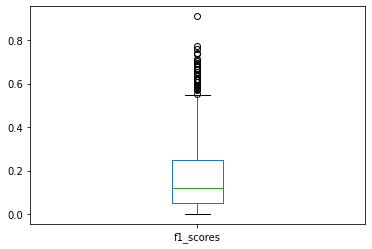

In [ ]:
from scipy.stats import sem
_ = tsd.f1_scores.plot(kind="box")
print (f"F1 = {tsd.f1_scores.mean():.2f} ± {sem(tsd.f1_scores):.2f}")

### Prepare the text file with the scores
* Name it as `spans-pred.txt`.
* Align the scores with the rows.

In [ ]:
# make sure that the ids match the ones of the scores
predictions = tsd.random_predictions.to_list()
ids = tsd.index.to_list()

# write in a prediction file named "spans-pred.txt"
with open("spans-pred.txt", "w") as out:
  for uid, text_scores in zip(ids, predictions):
    out.write(f"{str(uid)}\t{str(text_scores)}\n")

! head spans-pred.txt

0	[0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 14, 15, 18, 21, 22, 24, 25, 28, 30, 31, 35, 36, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 52, 57, 58, 61, 63, 68, 69, 70, 71, 72]
1	[2, 3, 5, 7, 8, 10, 11, 13, 17, 18, 19, 20, 21, 22, 25, 27, 28, 36, 37, 38, 39, 41, 44, 45, 46, 47, 48, 50, 51, 54, 55, 57, 58, 59, 65, 67, 68, 70, 71, 72, 75, 77, 79, 80, 83, 84, 86, 87, 88, 90, 92, 94, 95, 96, 97, 98, 104, 107, 108, 109, 110, 114, 115, 116, 117, 118, 119, 120, 124, 125, 126, 127, 132, 133, 134, 135, 136]
2	[3, 4, 7, 9, 10, 12, 17, 19, 23, 25, 28, 29, 30, 31, 32, 35, 36, 38, 44, 46, 47, 48, 50, 51, 52, 53, 56, 57, 59, 60, 64, 65, 66, 67, 68, 69, 74, 76, 78, 79, 80, 81, 83, 84, 85, 87, 88, 90, 92, 93, 94, 95, 96, 99, 100, 106, 108, 109, 111, 116, 117, 118, 119, 120, 121, 122, 123, 126, 133, 134, 135, 136, 138, 140, 142, 143, 144, 147, 155, 156, 158, 159, 160, 161, 164, 169, 170, 172, 173, 175, 176, 178, 179, 180, 183, 184, 185, 186]
3	[0, 2, 4, 5, 6, 7, 10, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 28, 30

### Zip the predictions
* Take extra care to verify that only the predictions text file is included. 
* The text file should **not** be within any directory. 
* No other file should be included; the zip should only contain the txt file.


In [ ]:
! zip -r random_predictions.zip ./spans-pred.* 

  adding: spans-pred.txt (deflated 77%)


###### Check by unziping it: only a `spans-pred.txt` file should be created

In [ ]:
! rm spans-pred.txt
! unzip random_predictions.zip

Archive:  random_predictions.zip
  inflating: spans-pred.txt          


### Download the zip and submit it to be assessed

In [ ]:
from google.colab import files
files.download("random_predictions.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### When the submission is finished click the `Download output from scoring step`
* The submission may take a while, so avoid late submissions.
* Download the output_file.zip and see your score in the respective file.